In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 200

import matplotlib.pyplot as plt
import seaborn as sns

import os
import re

import pickle
import logging

from functools import reduce

logger = logging.getLogger()
logging.basicConfig(format='%(asctime)s - %(message)s', level=logging.INFO)

In [2]:
DATA_PATH      = './data/was'
OUTPUT_PATH    = './result'
ERROR_FILE     = 'U11A_11_error.log'
# ERROR_FILE     = 'test2.out'

In [3]:
error_list = []

with open(os.path.join(DATA_PATH, ERROR_FILE), 'r') as fp:
   lines = fp.readlines()
   for line in lines:
        line  = re.split(r'\] ', line)
        front = list(map(lambda x: re.sub(r'[\[]', '', x), line[:-1]))
        if (len(front) == 2):
            error_list.append(front + ['-', line[-1]])
        else:
            error_list.append(front + [line[-1]])

In [4]:
nums = list(map(lambda x: len(x), error_list))

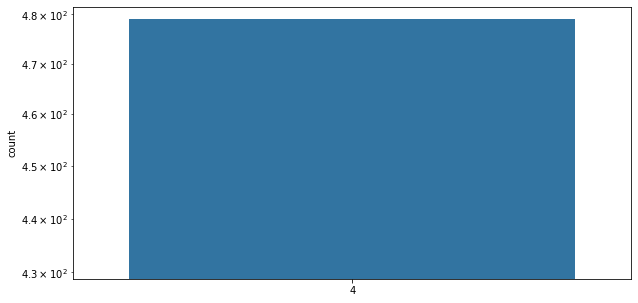

In [5]:
fig = plt.figure(figsize=(10,5))
plt.yscale('log')
sns.countplot(nums)
# plt.savefig('log_length.png')

In [6]:
error_log = pd.DataFrame(error_list, columns=['datetime', 'level', 'client_ip', 'contents'])

In [7]:
%%time
error_log['datetime2'] = error_log.loc[:, 'datetime'].map(lambda x: pd.to_datetime(x, format='%a %b %d %H:%M:%S %Y'))

CPU times: user 103 ms, sys: 3.58 ms, total: 107 ms
Wall time: 106 ms


In [10]:
error_log.head(10)

datetime   level              client_ip  \
0  Mon Jun 03 00:04:22 2019   error  client 192.168.79.122   
1  Mon Jun 03 02:12:52 2019  notice                      -   
2  Mon Jun 03 02:12:52 2019  notice                      -   
3  Mon Jun 03 02:12:52 2019    warn                      -   
4  Mon Jun 03 02:12:52 2019  notice                      -   
5  Mon Jun 03 08:46:51 2019   error  client 172.25.207.153   
6  Mon Jun 03 09:54:04 2019   error  client 172.25.240.242   
7  Mon Jun 03 09:54:04 2019   error  client 172.25.240.242   
8  Mon Jun 03 10:08:49 2019   error  client 172.25.207.153   
9  Mon Jun 03 11:02:10 2019   error   client 172.21.28.121   

                                                                                                      contents  \
0                                        File does not exist: /WAS/PGEPTL01/EWS2.1/httpd/www/html/robots.txt\n   
1                                                    Digest: generating secret for digest authentication ...\n   
2                                                                                               Digest: done\n   
3  pid file /WAS/PGEPTL01/EWS2.1/httpd/run/httpd.pid overwritten -- Unclean shutdown of previous Apache run?\n   
4                          Apache/2.2.26 (Unix) DAV/2 mod_jk/1.2.40 configured -- resuming normal operations\n   
5                Directory index forbidden by Options directive: /WAS/PGEPTL01/EWS2.1/httpd/www/html/applet/\n   
6                       Directory index forbidden by Options directive: /WAS/PGEPTL01/EWS2.1/httpd/www/html/\n   
7                                             File does not exist: /WAS/PGEPTL01/EWS2.1/httpd/www/html/error\n   
8                Directory index forbidden by Options directive: /WAS/PGEPTL01/EWS2.1/httpd/www/html/applet/\n   
9                       Directory index forbidden by Options directive: /WAS/PGEPTL01/EWS2.1/httpd/www/html/\n   

            datetime2  
0 2019-06-03 00:04:22  
1 2019-06-03 02:12:52  
2 2019-06-03 02:12:52  
3 2019-06-03 02:12:52  
4 2019-06-03 02:12:52  
5 2019-06-03 08:46:51  
6 2019-06-03 09:54:04  
7 2019-06-03 09:54:04  
8 2019-06-03 10:08:49  
9 2019-06-03 11:02:10

CPU times: user 31.4 ms, sys: 0 ns, total: 31.4 ms
Wall time: 30.3 ms


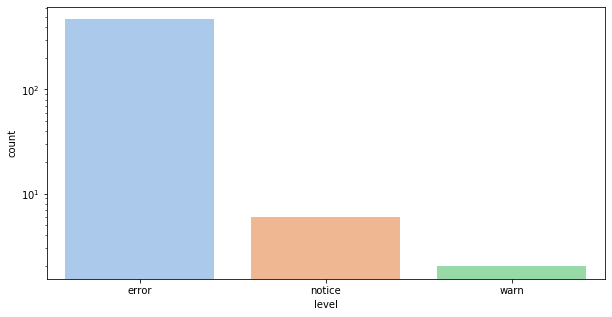

In [14]:
%%time
fig = plt.figure(figsize=(10,5))
sns.set_palette('pastel')
sns.countplot('level', data=error_log)
plt.yscale('log')
# plt.savefig('log_label.png')

In [ ]:
%%time
fig = plt.figure(figsize=(20,10))
sns.set_palette('pastel')
sns.scatterplot(x='datetime2', y='level', data=access_log, fit_reg=False)
ax.set_xlim(access_log['date_ordinal'].min() - 1, access_log['date_ordinal'].max() + 1)
ax.set_ylim(0, access_log['amount'].max() + 1)

ax.set_xlabel('date')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)
# plt.savefig('log_length.png')